In [ ]:
import time
import gym
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ImportError: numpy.core._multiarray_umath failed to import

In [2]:
env=gym.make('MountainCarContinuous-v0')
action_space_len=env.action_space
print(env.action_space)
print(env._max_episode_steps)

Box(-1.0, 1.0, (1,), float32)
999


In [3]:
print(env.observation_space.high)
print(env.observation_space.low)

[0.6  0.07]
[-1.2  -0.07]


In [4]:
scores=[]
training_data=[]
accepted_scores=[]
required_score=-190
for i in range(1000):
    env.reset()
    score=0
    game_mem=[]
    prev_obs=[]
    for j in range(200):
        action=env.action_space.sample()
        obs,reward,done,info=env.step(action)   
        if len(prev_obs)>0:
            game_mem.append([prev_obs,action])
        prev_obs=obs
        prev_obs=obs
        if obs[0]>-0.2:
            reward=1
        else:
            reward=-1
        score+=reward
        if done:
            break    
    if i %100==0:
        print(f'iter>{i},\tscore>{score}')
    scores.append(score)
    if score>required_score:
        accepted_scores.append(score)
        for data in game_mem:
            training_data.append(data)

iter>0,	score>-200
iter>100,	score>-200
iter>200,	score>-200
iter>300,	score>-200
iter>400,	score>-200
iter>500,	score>-200
iter>600,	score>-200
iter>700,	score>-200
iter>800,	score>-200
iter>900,	score>-200


-199.842
[-176, -168, -186, -166, -180, -178, -188]


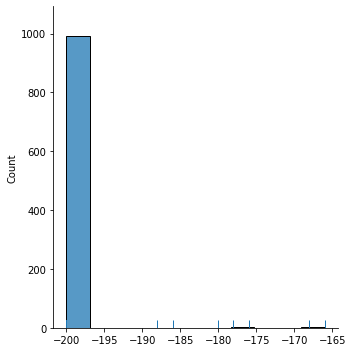

In [5]:

scores=np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.displot(scores,rug=True)

In [6]:
train_x=np.array([i[0] for i in training_data]).reshape(-1,2)
train_y=np.array([i[1] for i in training_data]).reshape(-1,1)
print(train_x.shape)
print(train_y.shape)

(1393, 2)
(1393, 1)


In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(),loss='mse')

In [8]:
hist=model.fit(train_x,train_y,epochs=10,validation_split=0.25)

Epoch 1/10
33/33 [==============================] - 0s 5ms/step - loss: 0.3331 - val_loss: 0.3322
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3316 - val_loss: 0.3335
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3319 - val_loss: 0.3318
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3327 - val_loss: 0.3313
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3319 - val_loss: 0.3327
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3330 - val_loss: 0.3307
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3326 - val_loss: 0.3316
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3304 - val_loss: 0.3305
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3321 - val_loss: 0.3308
Epoch 10/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3304 - val_loss: 0.3300


In [ ]:
scores=[]
steps=[]
actions=[]

for i in range(500):
    if i>0:
        print(f'{i}>\tmean step:{np.mean(steps[-100:])}\tmean score>{np.mean(scores[-100:])}')
    score=0
    step=0
    prev_obs=[]
    env.reset()
    for j in range(500):
        if len(prev_obs)==0:
            action=env.action_space.sample()
        else:
            action=model.predict(np.expand_dims(prev_obs,axis=0))[0]
            actions.append(action)
        obs,reward,done,info=env.step(action)
        prev_obs=obs
        score+=reward
        step+=1
        if done:
            break
    scores.append(score)
    steps.append(step)

1>	mean step:500.0	mean score>-0.11248002882607977
2>	mean step:500.0	mean score>-0.08565789085004272
3>	mean step:500.0	mean score>-0.07189378292427896
4>	mean step:500.0	mean score>-0.07941637888872081


NameError: name 'scores' is not defined

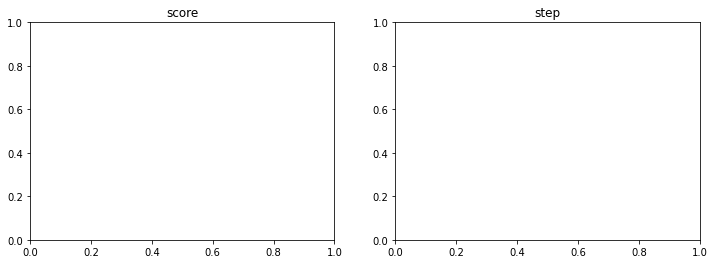

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.displot(scores,rug=True,ax=ax[0])
sns.displot(steps,rug=True,ax=ax[1])

print(np.mean(scores))

In [1]:
import time
import gym
import tensorflow as tf
import numpy as np
env=gym.make('MountainCarContinuous-v0')
action_space_len=env.action_space
print(env.action_space)
print(env._max_episode_steps)

Box(-1.0, 1.0, (1,), float32)
999


In [2]:
state_grid_count=10
action_grid_count=6
q_table=[]
for i in range(state_grid_count):
    q_table.append([])
    for j in range(state_grid_count):
        q_table[i].append([])
        for k in range(action_grid_count):
            q_table[i][j].append(1e-4)
            
actions=range(action_grid_count)
actions=np.array(actions).astype(float)
actions*=((env.action_space.high - env.action_space.low)/(action_grid_count -1))
actions+=env.action_space.low
print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


In [3]:
import random 
def obs_to_state(env,obs):
    obs=obs.flatten()
    low=env.observation_space.low
    high=env.observation_space.high
    idx=(obs-low)/(high-low)*state_grid_count
    idx=[int(x) for x in idx]
    return idx
def softmax(logits):
    exp_logits=np.exp(logits-np.max(logits))
    sum_exp_logits=np.sum(exp_logits)
    return exp_logits/sum_exp_logits

In [4]:
sample=env.observation_space.sample()
grid=obs_to_state(env,sample)
print(sample)
print(grid)

[-0.55807775  0.06392374]
[3, 9]


In [5]:
max_episode=1000
scores=[]
steps=[]
select_actions=[]
learning_rate=0.05
gamma=0.99
epsilon=1.0
epsilon_min=0.01

for i in range(max_episode):
    epsilon*=0.9
    epsilon=max(epsilon_min,epsilon)
    
    if i%100 == 0 and i!=0:
        print(f'i>{i}\tmean score>{np.mean(scores[-100:])}\tmean step>{np.mean(steps[-100:])}\tepsilon>{epsilon}')
        
    prev_obs=env.reset()
    score=0
    step=0
    while True:
        state_idx=obs_to_state(env,prev_obs)
        if random.random()<epsilon:
            action_idx=random.randint(0,action_grid_count-1)
            action=actions[action_idx]
        else:
            logits=q_table[state_idx[0]][state_idx[1]]
            action_idx=np.argmax(softmax(logits))
            action=actions[action_idx]
            
        obs,reward,done,info=env.step([action])
        prev_obs=obs
        score+=reward
        reward-=0.05
        step+=1
        
        select_actions.append(action)
        new_state_idx=obs_to_state(env,obs)
        
        q_table[state_idx[0]][state_idx[1]][action_idx]=q_table[state_idx[0]][state_idx[1]][action_idx]+learning_rate*(reward+gamma*np.amax(q_table[new_state_idx[0]][new_state_idx[1]])-q_table[state_idx[0]][state_idx[1]][action_idx])
        
        if done:
            break
    scores.append(score)
    steps.append(step)
    
    if np.mean(scores[-100:]) >= 90:
        print(f'Solved in {i}')
        break

i>100	mean score>3.6012791450691783	mean step>897.52	epsilon>0.01
i>200	mean score>-7.130600813114537	mean step>936.41	epsilon>0.01
i>300	mean score>86.98423957084178	mean step>437.62	epsilon>0.01
Solved in 313


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


30.702814601613515


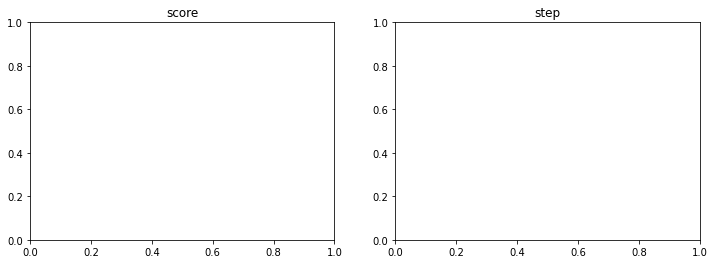

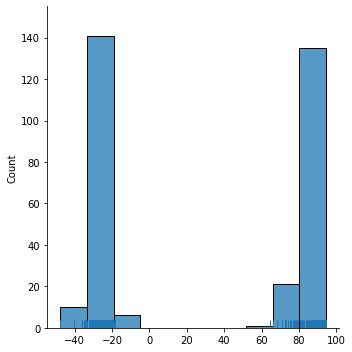

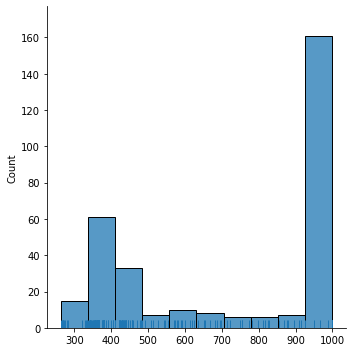

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.displot(scores,rug=True,ax=ax[0])
sns.displot(steps,rug=True,ax=ax[1])

print(np.mean(scores))

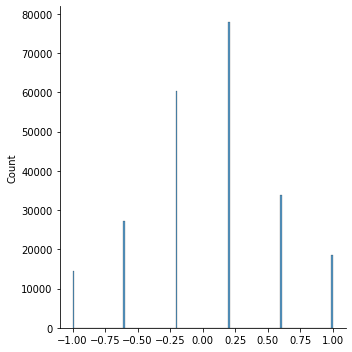

In [7]:
sns.displot(select_actions)

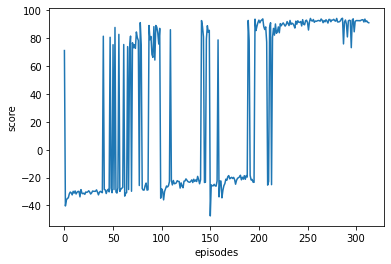

In [8]:
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

In [9]:
obs=env.reset()
for i in range(100):
    state_idx=obs_to_state(env,prev_obs)
    logits=q_table[state_idx[0]][state_idx[1]]
    action_idx=np.argmax(softmax(logits))
    action=actions[action_idx]
    obx,reward,done,info=env.step([action])
    env.render()
    if done:
        break

ImportError: 
    Error occurred while running `from pyglet.gl import *`
    HINT: make sure you have OpenGL install. On Ubuntu, you can run 'apt-get install python-opengl'.
    If you're running on a server, you may need a virtual frame buffer; something like this should work:
    'xvfb-run -s "-screen 0 1400x900x24" python <your_script.py>'
    